In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [3]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
# Load the breast cancer dataset


# Convert to pandas DataFrame
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names) #this only has the data without target variable

In [32]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


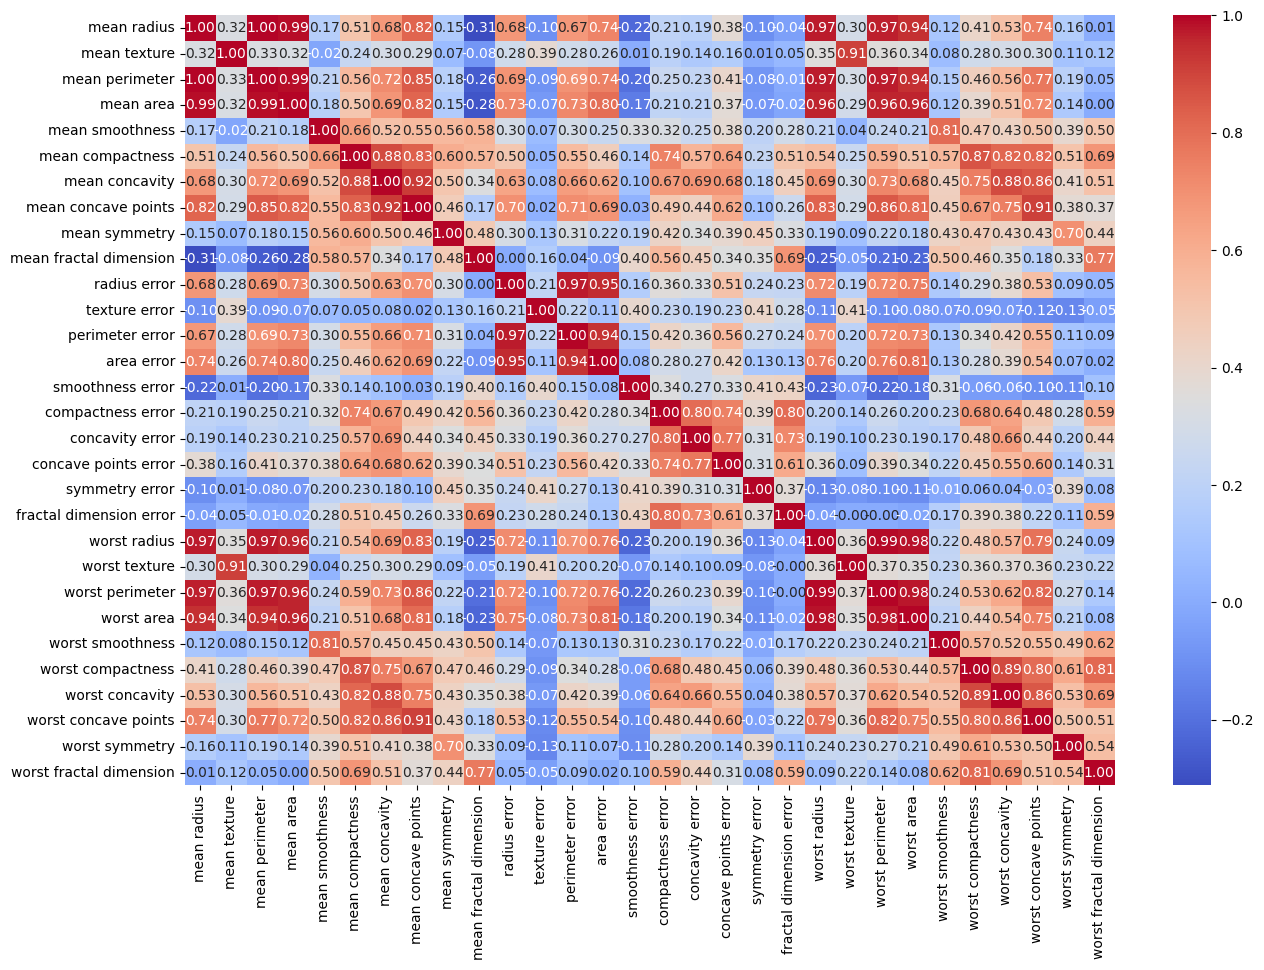

In [34]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

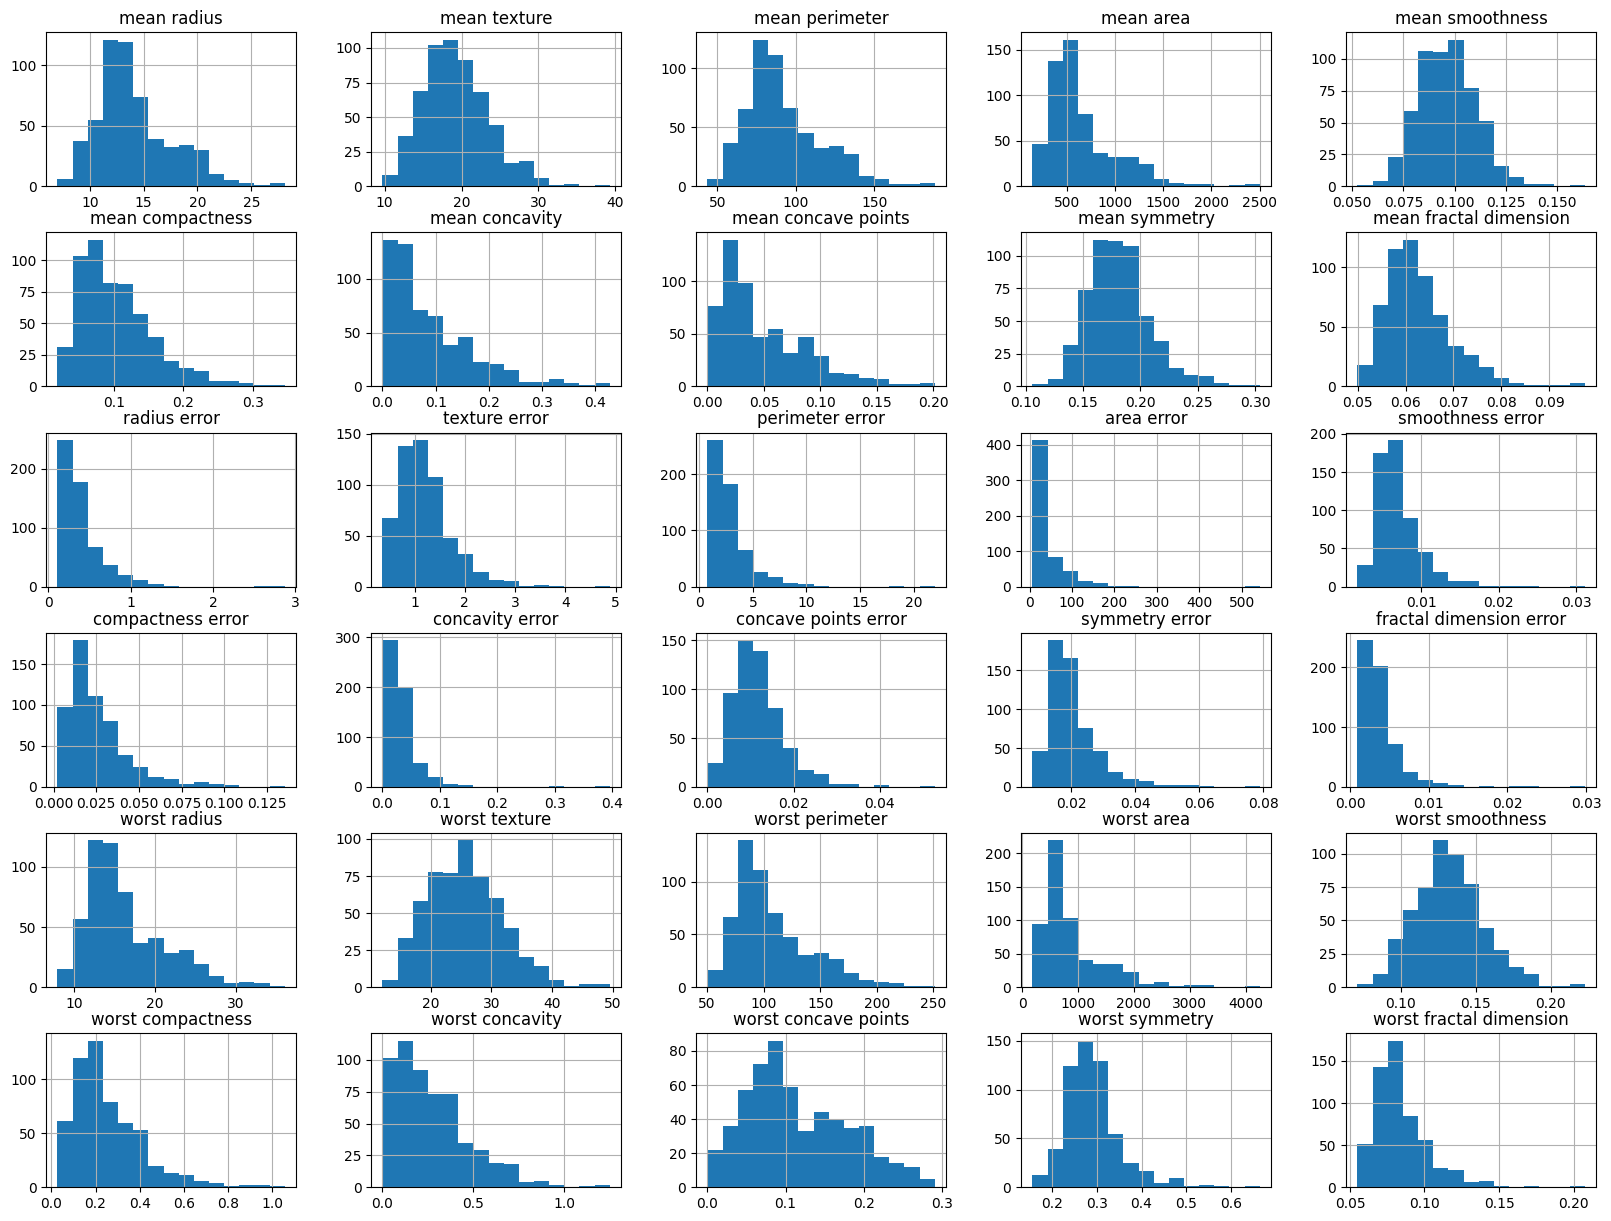

In [31]:
df.hist(bins=15, figsize=(20, 15))
plt.show()

In [6]:
# Add the target variable to the DataFrame
df['target'] = breast_cancer.target
df_final = df
df_final

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
df=df_final.drop('target',axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [10]:
# Implement SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [11]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = df.columns[selected_feature_indices]

In [12]:
# Printing the name of the selected features
print("Names of selected features:")
for i, feature in enumerate(selected_feature_names, 1):
    print(f"{i}. {feature}")

Names of selected features:
1. mean radius
2. mean perimeter
3. mean area
4. mean concavity
5. mean concave points
6. worst radius
7. worst perimeter
8. worst area
9. worst concavity
10. worst concave points


In [13]:
# Create a new DataFrame with only the selected features
df_selected = df.iloc[:, selected_feature_indices]
# Add the target variable to the selected DataFrame
df_selected['target'] = breast_cancer.target
df_selected

C:\Users\sat2d\AppData\Local\Temp\ipykernel_15396\234746001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['target'] = breast_cancer.target


,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points,target
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654,0
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860,0
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430,0
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575,0
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216,0
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628,0
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418,0
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650,0


In [14]:
# Ensuring lengths match for feature scores
if len(df.columns) == len(selector.scores_):
    # Print feature scores
    feature_scores = pd.DataFrame({
        'Feature': df.columns,
        'Score': selector.scores_
    })
    print("\nFeature Scores (sorted):")
    print(feature_scores.sort_values('Score', ascending=False))
else:
    print("Error: The number of features and scores do not match.")


Feature Scores (sorted):
                    Feature       Score
27     worst concave points  746.492117
7       mean concave points  695.179785
22          worst perimeter  681.263759
20             worst radius  645.350668
2            mean perimeter  522.489267
23               worst area  495.787667
0               mean radius  482.233945
3                 mean area  423.654133
6            mean concavity  396.662370
26          worst concavity  331.330906
5          mean compactness  242.589647
25        worst compactness  240.492785
10             radius error  186.591816
12          perimeter error  176.223231
13               area error  165.307401
21            worst texture  126.681903
28           worst symmetry  108.953927
24         worst smoothness  102.973429
1              mean texture   94.917788
17     concave points error   76.565923
4           mean smoothness   74.190147
8             mean symmetry   62.469542
29  worst fractal dimension   49.197922
15        comp

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

In [16]:
# Defining the parameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

In [17]:
# Seting up the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

In [18]:
# Fit GridSearchCV
grid_search.fit(X_train_selected, y_train)

# Print the best parameters and best score
print("\nBest Parameters are:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Score is:")
print(grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters are:
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}

Best Cross-Validation Score is:
0.9582417582417582


In [19]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_selected, y_test)

print("\nTest Set Score:")
print(test_score)


Test Set Score:
0.9736842105263158


In [20]:
# Get the best model
best_model = grid_search.best_estimator_

# Train the best model (it's already trained, but this will give us the training history)
best_model.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000,
                               random_state=42))])

In [21]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test_selected)
test_score = best_model.score(X_test_selected, y_test)

In [22]:
print("\nTest Set Score:")
print(test_score)


Test Set Score:
0.9736842105263158


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))



Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [24]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (2.2.2)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (3.9.1)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.1)

Requirement already satisfied: cycler>=0.10 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.53.1)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\sat2d\appdata\roaming\python\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.1)

Requirement already satisfied: pillow>=8 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.2)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\sat2d\appdata\roaming\python\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\sat2d\appdata\local\programs\python\python312\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: six>=1.5 in c:\users\sat2d\appdata\roaming\python\python312\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

0

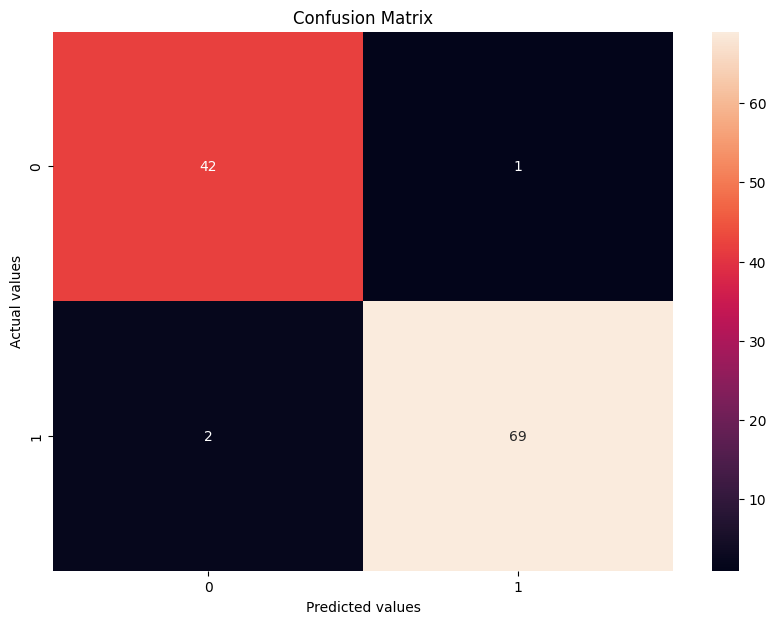

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [26]:
# If you want to visualize the decision boundary (only possible for 2D data)
# Since we have more than 2 features, let's use the top 2 features from SelectKBest

top_2_features = selected_feature_indices[:2]
X_top2 = X[:, top_2_features]
X_train_top2, X_test_top2, y_train, y_test = train_test_split(X_top2, y, test_size=0.2, random_state=42)

In [27]:
import joblib
# Save the best model to a pickle file
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'gridsearch.pkl')
print("Pickel file of gridsearch model is created")

Pickel file of gridsearch model is created
